In [1]:
# import libraries
import tifffile
import napari
import seaborn as sns
import pandas as pd
import glob
from src.fonctions import *

## Bonus : Segmentation  and labels backup

In [ ]:
# images fichier longues
for image in glob.glob('data_triées/longues/*.tif') : 
    label = segmentation_longue(image)
    splitted_path = image.split("/")
    name = splitted_path[-1]
    tifffile.imwrite('labels_corrects/longues/' + name ,label)

In [ ]:
# images fichier croco
for image in glob.glob('data_triées/croco/*.tif') : 
    label = segmentation_croco(image)
    splitted_path = image.split("/")
    name = splitted_path[-1]
    tifffile.imwrite('labels_corrects/croco/' + name ,label)

In [ ]:
# images fichier puzzle
for image in glob.glob('data_triées/puzzle/*.tif') : 
    label = segmentation_puzzle(image)
    splitted_path = image.split("/")
    name = splitted_path[-1]
    tifffile.imwrite('labels_corrects/puzzle/' + name ,label)

In [ ]:
# images fichier veines
for image in glob.glob('data_triées/veines/*.tif') : 
    label = segmentation_veine(image)
    splitted_path = image.split("/")
    name = splitted_path[-1]
    tifffile.imwrite('labels_corrects/veines/' + name ,label)

In [ ]:
# images fichier stomata
for image in glob.glob('data_triées/stomata/*.tif') : 
    label = segmentation_stomates(image)
    splitted_path = image.split("/")
    name = splitted_path[-1]
    tifffile.imwrite('labels_corrects/stomate/' + name ,label)

## I create the finale dataframe (species, image, cell, lobeyness, area) to make plots

### I use the function species (for each specie). This function will create a dataframe containing the area, the perimeter, the lobeyness for each cell of each image belonging to one specie.

In [2]:
ceratostigma_minus = species('labels_corrects/3.07', 'ceratostigma_minus')
rosa_mollis = species('labels_corrects/3.15', 'rosa_mollis')
persicaria_virginiana = species('labels_corrects/4.01', 'persicaria_virginiana')
polygonum_chinense = species('labels_corrects/4.02', 'polygonum_chinense')
paeonia_tenuifolia = species('labels_corrects/4.15', 'paeonia_tenuifolia')
aconitum_carmichaelii = species('labels_corrects/4.17', 'aconitum_carmichaelii')
beta_vulgaris = species('labels_corrects/5.22', 'beta_vulgaris')
galium_rubioides = species('labels_corrects/6.19', 'galium_rubioides')
galium_odoratum = species('labels_corrects/6.21', 'galium_odoratum')
danae_racemosa = species('labels_corrects/7.01', 'danae_racemosa')
rohdea_japonica = species('labels_corrects/7.15', 'rohdea_japonica')
alstroemeria_aurea = species('labels_corrects/7.23', 'alstroemeria_aurea')
hemerocallis_fulva = species('labels_corrects/7.24', 'hemerocallis_fulva')
jasminum_fructicans = species('labels_corrects/8.06', 'jasminum_fructicans')

### I separate my species in two datasets to allow a better visibility in the plots

In [3]:
df_total_1 = pd.DataFrame()
df_total_1 = pd.concat([ceratostigma_minus, rosa_mollis, persicaria_virginiana, polygonum_chinense, paeonia_tenuifolia, aconitum_carmichaelii, beta_vulgaris])
df_total_2 = pd.DataFrame()
df_total_2 = pd.concat([galium_rubioides, galium_odoratum, danae_racemosa, rohdea_japonica, alstroemeria_aurea, hemerocallis_fulva, jasminum_fructicans])

### I remove the outliers (which I estimate to be above 2 and below 0.99) to better see the graph. If I don't do this operation, my graphs would look like lines and would not be readable.

In [4]:
df_total_1_clean = df_total_1[(df_total_1["lobeyness"]>0.99)&(df_total_1["lobeyness"]<2)]
df_total_1_clean

,label,area,perimeter,convex_perimeter,lobeyness,Species_name
0,1,503,112.047727,107.396970,1.043304,ceratostigma_minus
1,2,7044,569.345238,441.948268,1.288262,ceratostigma_minus
2,3,2675,505.765548,438.509668,1.153374,ceratostigma_minus
3,4,1443,209.396970,202.769553,1.032684,ceratostigma_minus
4,5,1973,298.160426,290.911688,1.024917,ceratostigma_minus
...,...,...,...,...,...,...
349,350,1134,134.319805,133.698485,1.004647,beta_vulgaris
350,351,727,116.426407,111.254834,1.046484,beta_vulgaris
351,352,1053,159.160426,147.781746,1.076997,beta_vulgaris
352,353,1588,181.917785,178.468037,1.019330,beta_vulgaris


In [5]:
df_total_2_clean = df_total_2[(df_total_2["lobeyness"]>0.99)&(df_total_2["lobeyness"]<2)]
df_total_2_clean

,label,area,perimeter,convex_perimeter,lobeyness,Species_name
0,1,548,108.526912,107.941125,1.005427,galium_rubioides
2,3,2214,238.237590,208.367532,1.143353,galium_rubioides
3,4,4290,345.906638,302.551299,1.143299,galium_rubioides
4,5,16061,620.978751,522.475180,1.188533,galium_rubioides
5,6,20020,1655.384956,890.073160,1.859830,galium_rubioides
...,...,...,...,...,...,...
118,119,7762,447.090404,387.421356,1.154016,jasminum_fructicans
119,120,5235,448.806133,363.882251,1.233383,jasminum_fructicans
120,121,16748,669.345238,614.676190,1.088940,jasminum_fructicans
121,122,17583,1111.868145,771.973701,1.440293,jasminum_fructicans


## Violinplot des espèces

[Text(0.5, 1.0, 'Violinplot of the lobeyness of differente species (1/2)')]

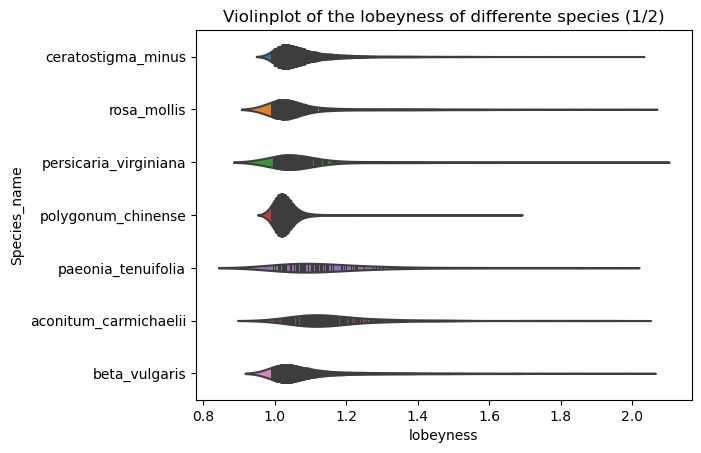

In [7]:
# violinplot n°1
sns.violinplot(data = df_total_1_clean,y = "Species_name", x = "lobeyness", inner="stick").set(title='Violinplot of the lobeyness of differente species (1/2)')

[Text(0.5, 1.0, 'Violinplot of the lobeyness of differente species (2/2)')]

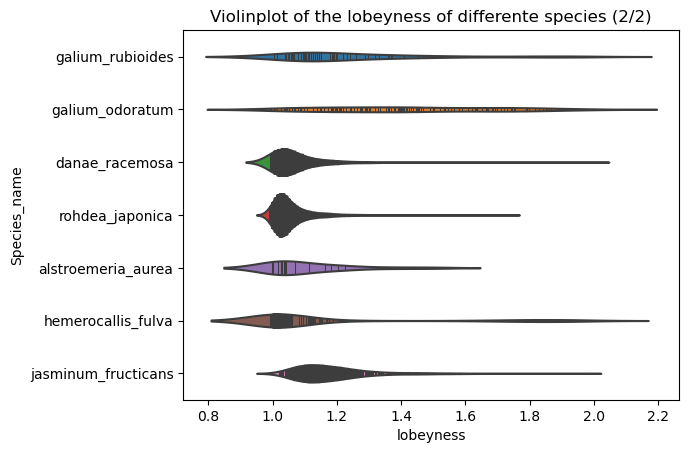

In [8]:
# violinplot n°2
sns.violinplot(data = df_total_2_clean,y = "Species_name", x = "lobeyness", inner="stick").set(title='Violinplot of the lobeyness of differente species (2/2)')

### Scatter plot

In [9]:
# I import a new function to make zoom on my scatter plot
%matplotlib notebook

In [10]:
# I join the two dataframes to form a single one
df_total_clean = pd.concat([df_total_1_clean, df_total_2_clean])

<IPython.core.display.Javascript object>


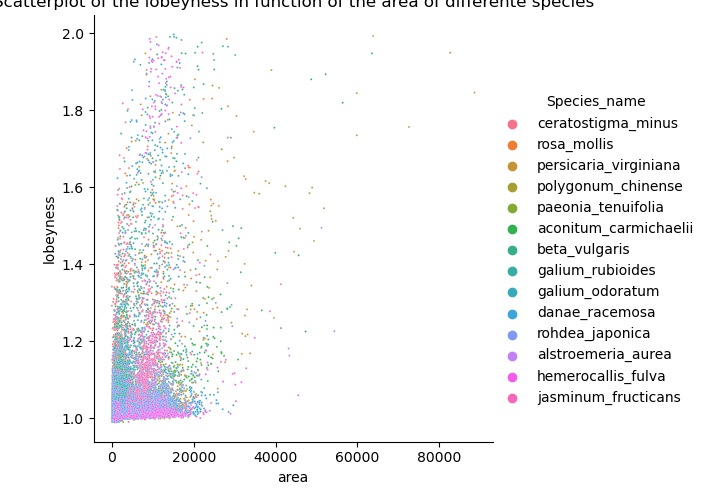

In [11]:
# I plot the scatter
sns.relplot(data = df_total_clean, x = "area", y = "lobeyness", hue = "Species_name", s=2).set(title='Scatterplot of the lobeyness in function of the area of differente species')

### Bonus : parametric map

In [6]:
# I join the 2 dataframes df_total_1 and df_total_2 to make the parametric map 
df_total = pd.concat([df_total_1, df_total_2])

In [8]:
# I use the parametric_map function
parametric_map ('/home/criuser/Documents/L2/informatique/projet info/test projet/labels_corrects/3.15/3-15-700x-1-02.tif', df_total)